In [1]:
import pandas as pd
import numpy as np
# import scipy
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('raw_data/pod_recommender_probation_task.csv', sep=",")

In [3]:
df.describe()

,mobile_phones_count,computer_count,tablet_count,other_count,smarthome_count,wearables_count,gaming_count,tv_&_audio_count,printer_&_scanners_count,network_count,...,traffic_rx_bucket,pod_count,speed_tier_bucket,interference_24G_bucket,interference_5G_bucket,dls_score_bucket,WEM_bucket,RSSI_bucket_24G,RSSI_bucket_5G,has_pod
count,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,...,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000,20627.000000
mean,2.166238,1.228535,0.435449,5.236729,0.824356,0.132836,0.129345,0.306588,0.218015,0.007224,...,2.996461,0.090270,1.847191,1.048965,1.130315,2.320260,2.930043,1.572114,0.969215,0.090270
std,1.889934,1.332283,0.762968,4.108375,1.180021,0.415217,0.397126,0.654928,0.426879,0.090765,...,1.411309,0.286575,1.147815,0.400508,0.706994,2.493591,0.774548,0.855435,0.172739,0.286575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,2.000000,1.000000,1.000000,5.000000,3.000000,2.000000,1.000000,0.000000
max,19.000000,19.000000,8.000000,66.000000,12.000000,6.000000,4.000000,13.000000,4.000000,3.000000,...,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


In [4]:
# check customer counts who used POD or not
df.groupby(["has_pod"])["gw_mac_address"].count().reset_index(drop=False).rename(columns={"gw_mac_address":"counts"})

,has_pod,counts
0,0,18765
1,1,1862


In [5]:
(df["pod_count"].astype(int).dtypes )

dtype('int32')

In [6]:
# Check variables for each column seperately 
column_list = list(df.columns)
column_list.remove("gw_mac_address")
column_list.remove("has_pod")
column_list.remove("pod_count")
columns_with_small_sample = []

for column in column_list:
    print(f"\n unique records for columns " + column + ": ", df[column].unique())
    if (df[column].dtypes != 'O'):
        counts = df[df[column] > 0].shape[0]
        perc = round(df[df[column] > 0].shape[0]/df.shape[0],2)
        perc_pod = round(df[(df[column] > 0) & (df['has_pod'] > 0)].shape[0]/df[(df['has_pod'] > 0)].shape[0],2)
    if (df[column].dtypes == 'O'):
        counts = df[~df[column].isna()].shape[0]
        perc = round(df[~df[column].isna()].shape[0]/df.shape[0],2)
        perc_pod = round(df[(~df[column].isna()) & (df['has_pod'] > 0)].shape[0]/df[(df['has_pod'] > 0)].shape[0],2)

    print("non zero counts for columns " + column + ": ", counts, ", perc: ", perc, ", perc for customers with Pod: ", perc_pod)

    if perc < 0.25:
        columns_with_small_sample = columns_with_small_sample + [column]
        

columns_with_small_sample


 unique records for columns mobile_phones_count:  [ 0  2  1  7  4  3 10  5 13  6 14  9  8 17 19 11 12 16 15]
non zero counts for columns mobile_phones_count:  17088 , perc:  0.83 , perc for customers with Pod:  0.88

 unique records for columns computer_count:  [ 0  3  1  5  2  4  6 11  7 19  8  9 10 12]
non zero counts for columns computer_count:  13320 , perc:  0.65 , perc for customers with Pod:  0.67

 unique records for columns tablet_count:  [0 1 2 4 3 6 7 5 8]
non zero counts for columns tablet_count:  6426 , perc:  0.31 , perc for customers with Pod:  0.4

 unique records for columns other_count:  [ 1 14 11  2  4  7 10  6  0  8 12  9  5 16  3 19 13 15 30 17 21 27 28 24
 20 18 22 26 39 35 29 25 51 46 23 33 60 41 37 66 43 45 32 42]
non zero counts for columns other_count:  19792 , perc:  0.96 , perc for customers with Pod:  0.98

 unique records for columns smarthome_count:  [ 0  4  1  2  3  5  6  7  9  8 11 10 12]
non zero counts for columns smarthome_count:  9589 , perc:  0.46

['wearables_count',
 'gaming_count',
 'tv_&_audio_count',
 'printer_&_scanners_count',
 'network_count']

In [7]:
# create new columns:
df["total_count_computer_phone_tablet"] = df["computer_count"] + df["tablet_count"] + df["mobile_phones_count"]
df["total_count"] = df["computer_count"] + df["tablet_count"] + df["mobile_phones_count"] + df["other_count"] + df["smarthome_count"] + df["wearables_count"] + df["gaming_count"] + df["tv_&_audio_count"] + df["printer_&_scanners_count"]
df["total_count_gaming_tv_printer "] = df["gaming_count"] + df["tv_&_audio_count"] + df["printer_&_scanners_count"]

df.loc[df["traffic_tx_bucket"] <= 2, "bad_quality_traffic_tx"] = 1
df.loc[df["traffic_rx_bucket"] <= 3, "bad_quality_traffic_rx"] = 1
df.loc[df["speed_tier_bucket"] <= 3, "bad_quality_speed_tier"] = 1
df.loc[df["interference_5G_bucket"] < 2, "bad_quality_interference_5G"] = 1
df.loc[df["WEM_bucket"] <= 2, "bad_quality_WEM"] = 1
df = df.fillna(0)

In [8]:
# has_pod and pod_count exactly same data which we want to predict, so we can not use pod_count for predicion.
# remove pod_count column
print(df.shape[0])
df[df["has_pod"] == df["pod_count"]].shape[0]

# remove columns with less record and pod_count
df = df.drop(columns=["pod_count"] + columns_with_small_sample)

20627


In [9]:
# it seems that Pod_Home might be a network type only if the customer has Pod
df.groupby(["home_network_type", "has_pod"])["gw_mac_address"].count()

# traffic_tx_bucket base on home_network_type
test_1 = df[df["has_pod"] == 1].groupby(["traffic_tx_bucket", "home_network_type"])["gw_mac_address"].count().reset_index(drop=False).rename(columns={"gw_mac_address":"counts"})
test_2 = df[df["has_pod"] == 1].groupby(["traffic_tx_bucket"])["gw_mac_address"].count().reset_index(drop=False).rename(columns={"gw_mac_address":"counts_of_traffic_tx_bucket_with_pod"})
test_3 = pd.merge(test_1, test_2, on=["traffic_tx_bucket"], how="left")
test_3["count_perc"] = test_3["counts"] / test_3["counts_of_traffic_tx_bucket_with_pod"]
test_3[["traffic_tx_bucket", "home_network_type", "count_perc"]].pivot(index='traffic_tx_bucket', columns='home_network_type', values='count_perc')

# traffic_rx_bucket base on home_network_type
test_1 = df[df["has_pod"] == 1].groupby(["traffic_rx_bucket", "home_network_type"])["gw_mac_address"].count().reset_index(drop=False).rename(columns={"gw_mac_address":"counts"})
test_2 = df[df["has_pod"] == 1].groupby(["traffic_rx_bucket"])["gw_mac_address"].count().reset_index(drop=False).rename(columns={"gw_mac_address":"counts_of_traffic_rx_bucket_with_pod"})
test_3 = pd.merge(test_1, test_2, on=["traffic_rx_bucket"], how="left")
test_3["count_perc"] = test_3["counts"] / test_3["counts_of_traffic_rx_bucket_with_pod"]
test_3[["traffic_rx_bucket", "home_network_type", "count_perc"]].pivot(index='traffic_rx_bucket', columns='home_network_type', values='count_perc')

df = df.drop(columns=["home_network_type"])


In [10]:
# corelation matrix
cor_matrix_all = df.corr()
cor_matrix_all

,mobile_phones_count,computer_count,tablet_count,other_count,smarthome_count,traffic_tx_bucket,traffic_rx_bucket,speed_tier_bucket,interference_24G_bucket,interference_5G_bucket,...,RSSI_bucket_5G,has_pod,total_count_computer_phone_tablet,total_count,total_count_gaming_tv_printer,bad_quality_traffic_tx,bad_quality_traffic_rx,bad_quality_speed_tier,bad_quality_interference_5G,bad_quality_WEM
mobile_phones_count,1.000000,0.216259,0.175034,0.232125,0.087051,0.149662,0.145435,0.038731,-0.000378,0.029396,...,0.078792,0.050976,0.829635,0.553449,0.140210,-0.145584,-0.097955,-0.039812,-0.027803,-0.074396
computer_count,0.216259,1.000000,0.118348,0.243028,0.046505,0.111346,0.243995,-0.007440,0.021278,0.041574,...,0.058380,0.018345,0.657253,0.477378,0.161785,-0.130492,-0.192836,-0.006914,-0.024115,-0.018600
tablet_count,0.175034,0.118348,1.000000,0.157884,0.087756,-0.077512,-0.030041,0.028984,-0.017263,-0.011458,...,0.039917,0.071665,0.449145,0.338385,0.118947,0.057002,0.045217,-0.031912,0.022030,-0.034416
other_count,0.232125,0.243028,0.157884,1.000000,0.257902,-0.015038,0.009301,0.091987,-0.003185,0.038819,...,0.071481,0.136764,0.316889,0.861242,0.217508,-0.001893,0.027596,-0.110269,-0.034536,-0.163239
smarthome_count,0.087051,0.046505,0.087756,0.257902,1.000000,-0.115299,-0.116647,0.064051,-0.026016,-0.003828,...,0.038881,0.068968,0.105313,0.417123,0.132503,0.094197,0.124299,-0.063174,0.012071,-0.059145
traffic_tx_bucket,0.149662,0.111346,-0.077512,-0.015038,-0.115299,1.000000,0.610894,-0.012308,0.028489,0.061828,...,0.055839,-0.026563,0.133531,0.030280,0.034746,-0.866937,-0.483641,0.018652,-0.060006,0.206761
traffic_rx_bucket,0.145435,0.243995,-0.030041,0.009301,-0.116647,0.610894,1.000000,-0.023289,0.029984,0.052356,...,0.052851,-0.038529,0.207090,0.079870,0.027985,-0.531290,-0.864506,0.024043,-0.044287,0.147998
speed_tier_bucket,0.038731,-0.007440,0.028984,0.091987,0.064051,-0.012308,-0.023289,1.000000,-0.027807,-0.008080,...,0.019798,0.102074,0.030651,0.092197,0.044968,0.006349,0.025442,-0.791064,0.013003,0.020441
interference_24G_bucket,-0.000378,0.021278,-0.017263,-0.003185,-0.026016,0.028489,0.029984,-0.027807,1.000000,0.344734,...,-0.007644,-0.007254,0.005191,-0.006967,-0.010923,-0.024382,-0.021142,0.021748,-0.284480,-0.056578
interference_5G_bucket,0.029396,0.041574,-0.011458,0.038819,-0.003828,0.061828,0.052356,-0.008080,0.344734,1.000000,...,0.284940,0.048901,0.036681,0.041681,0.013891,-0.054980,-0.040452,-0.002052,-0.848030,-0.015773


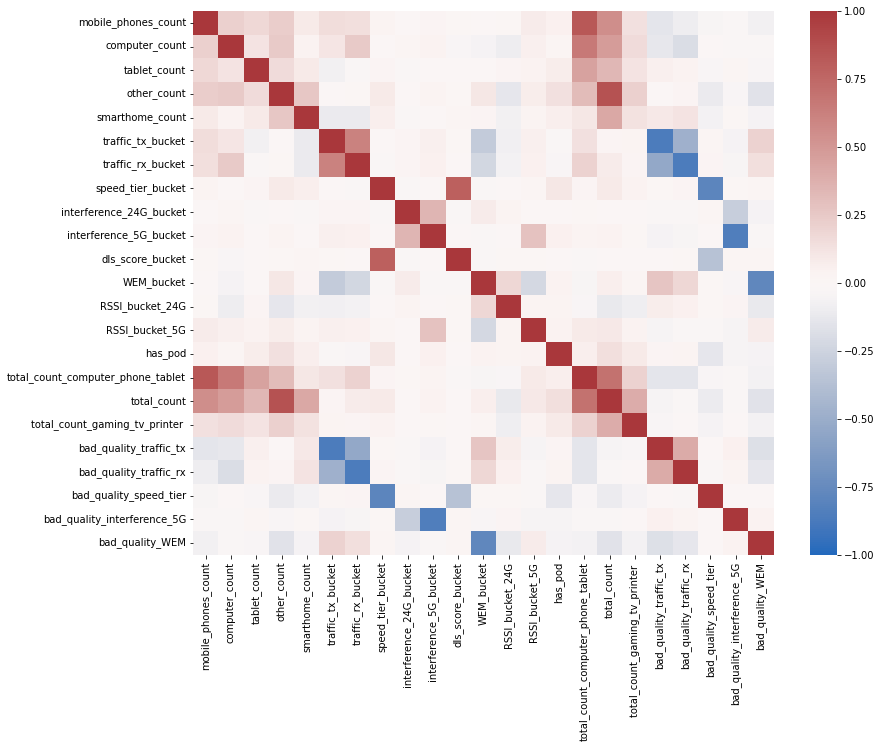

In [11]:
fig, ax = plt.subplots(figsize=(13,10))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(cor_matrix_all, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [12]:
# corelation matrix 
cor_matrix_pod_users = df.drop(columns=["has_pod"]).corr()
cor_matrix_pod_users

# speed_tier_bucket and dls_score_bucket columns are highly correcleted columns, so we can remove one of them

,mobile_phones_count,computer_count,tablet_count,other_count,smarthome_count,traffic_tx_bucket,traffic_rx_bucket,speed_tier_bucket,interference_24G_bucket,interference_5G_bucket,...,RSSI_bucket_24G,RSSI_bucket_5G,total_count_computer_phone_tablet,total_count,total_count_gaming_tv_printer,bad_quality_traffic_tx,bad_quality_traffic_rx,bad_quality_speed_tier,bad_quality_interference_5G,bad_quality_WEM
mobile_phones_count,1.000000,0.216259,0.175034,0.232125,0.087051,0.149662,0.145435,0.038731,-0.000378,0.029396,...,0.012062,0.078792,0.829635,0.553449,0.140210,-0.145584,-0.097955,-0.039812,-0.027803,-0.074396
computer_count,0.216259,1.000000,0.118348,0.243028,0.046505,0.111346,0.243995,-0.007440,0.021278,0.041574,...,-0.099372,0.058380,0.657253,0.477378,0.161785,-0.130492,-0.192836,-0.006914,-0.024115,-0.018600
tablet_count,0.175034,0.118348,1.000000,0.157884,0.087756,-0.077512,-0.030041,0.028984,-0.017263,-0.011458,...,0.029362,0.039917,0.449145,0.338385,0.118947,0.057002,0.045217,-0.031912,0.022030,-0.034416
other_count,0.232125,0.243028,0.157884,1.000000,0.257902,-0.015038,0.009301,0.091987,-0.003185,0.038819,...,-0.133312,0.071481,0.316889,0.861242,0.217508,-0.001893,0.027596,-0.110269,-0.034536,-0.163239
smarthome_count,0.087051,0.046505,0.087756,0.257902,1.000000,-0.115299,-0.116647,0.064051,-0.026016,-0.003828,...,-0.074217,0.038881,0.105313,0.417123,0.132503,0.094197,0.124299,-0.063174,0.012071,-0.059145
traffic_tx_bucket,0.149662,0.111346,-0.077512,-0.015038,-0.115299,1.000000,0.610894,-0.012308,0.028489,0.061828,...,-0.081511,0.055839,0.133531,0.030280,0.034746,-0.866937,-0.483641,0.018652,-0.060006,0.206761
traffic_rx_bucket,0.145435,0.243995,-0.030041,0.009301,-0.116647,0.610894,1.000000,-0.023289,0.029984,0.052356,...,-0.067074,0.052851,0.207090,0.079870,0.027985,-0.531290,-0.864506,0.024043,-0.044287,0.147998
speed_tier_bucket,0.038731,-0.007440,0.028984,0.091987,0.064051,-0.012308,-0.023289,1.000000,-0.027807,-0.008080,...,-0.001960,0.019798,0.030651,0.092197,0.044968,0.006349,0.025442,-0.791064,0.013003,0.020441
interference_24G_bucket,-0.000378,0.021278,-0.017263,-0.003185,-0.026016,0.028489,0.029984,-0.027807,1.000000,0.344734,...,0.036957,-0.007644,0.005191,-0.006967,-0.010923,-0.024382,-0.021142,0.021748,-0.284480,-0.056578
interference_5G_bucket,0.029396,0.041574,-0.011458,0.038819,-0.003828,0.061828,0.052356,-0.008080,0.344734,1.000000,...,-0.015539,0.284940,0.036681,0.041681,0.013891,-0.054980,-0.040452,-0.002052,-0.848030,-0.015773


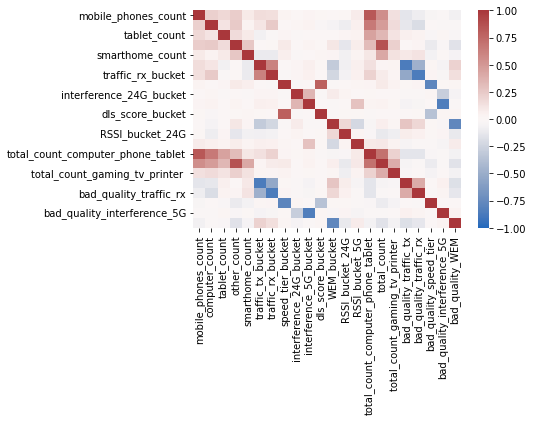

In [13]:
sns.heatmap(cor_matrix_pod_users, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [14]:
def find_highly_correlated_features(df_correlation, correlation_label, target_col):
    print(df_correlation)
    print(correlation_label)
    # return features that should be removed
    dropped_features = set()
    for row_name, row in df_correlation.iterrows():
        if row_name in dropped_features:
            continue
        for column_name in df_correlation.columns:
            if column_name in dropped_features:
                continue
            if row[column_name] > 0.7:
                column_label_correlation = correlation_label.loc[column_name].has_pod
                row_label_correlation = correlation_label.loc[row_name].has_pod
                print(row[column_name], row_name, column_name)
                print(column_label_correlation, row_label_correlation)
                if row_name == column_name:
                    break
                elif column_label_correlation > row_label_correlation:
                    dropped_features.add(row_name)
                    break
                else:
                    dropped_features.add(column_name)
                print(dropped_features)
    return (dropped_features)

In [15]:
dropped_features = find_highly_correlated_features(cor_matrix_pod_users.abs(), cor_matrix_all[["has_pod"]].abs(), "has_pod")
dropped_features

                                   mobile_phones_count  computer_count  \
mobile_phones_count                           1.000000        0.216259   
computer_count                                0.216259        1.000000   
tablet_count                                  0.175034        0.118348   
other_count                                   0.232125        0.243028   
smarthome_count                               0.087051        0.046505   
traffic_tx_bucket                             0.149662        0.111346   
traffic_rx_bucket                             0.145435        0.243995   
speed_tier_bucket                             0.038731        0.007440   
interference_24G_bucket                       0.000378        0.021278   
interference_5G_bucket                        0.029396        0.041574   
dls_score_bucket                              0.000862        0.037399   
WEM_bucket                                    0.014544        0.058786   
RSSI_bucket_24G                       

{'WEM_bucket',
 'bad_quality_traffic_rx',
 'bad_quality_traffic_tx',
 'dls_score_bucket',
 'interference_5G_bucket',
 'mobile_phones_count',
 'other_count',
 'speed_tier_bucket'}

In [16]:
# remove columns with highly corrlated
df = df.drop(columns=["dls_score_bucket", "mobile_phones_count", "other_count"])

In [17]:
cor_matrix_all.abs().sort_values("has_pod", ascending=False)

,mobile_phones_count,computer_count,tablet_count,other_count,smarthome_count,traffic_tx_bucket,traffic_rx_bucket,speed_tier_bucket,interference_24G_bucket,interference_5G_bucket,...,RSSI_bucket_5G,has_pod,total_count_computer_phone_tablet,total_count,total_count_gaming_tv_printer,bad_quality_traffic_tx,bad_quality_traffic_rx,bad_quality_speed_tier,bad_quality_interference_5G,bad_quality_WEM
has_pod,0.050976,0.018345,0.071665,0.136764,0.068968,0.026563,0.038529,0.102074,0.007254,0.048901,...,0.040470,1.000000,0.062973,0.142998,0.089078,0.024529,0.032833,0.135826,0.051533,0.057783
total_count,0.553449,0.477378,0.338385,0.861242,0.417123,0.030280,0.079870,0.092197,0.006967,0.041681,...,0.100195,0.142998,0.696325,1.000000,0.398002,0.050661,0.023419,0.109078,0.030674,0.159375
other_count,0.232125,0.243028,0.157884,1.000000,0.257902,0.015038,0.009301,0.091987,0.003185,0.038819,...,0.071481,0.136764,0.316889,0.861242,0.217508,0.001893,0.027596,0.110269,0.034536,0.163239
bad_quality_speed_tier,0.039812,0.006914,0.031912,0.110269,0.063174,0.018652,0.024043,0.791064,0.021748,0.002052,...,0.022899,0.135826,0.039049,0.109078,0.055227,0.009360,0.024616,1.000000,0.001845,0.013882
speed_tier_bucket,0.038731,0.007440,0.028984,0.091987,0.064051,0.012308,0.023289,1.000000,0.027807,0.008080,...,0.019798,0.102074,0.030651,0.092197,0.044968,0.006349,0.025442,0.791064,0.013003,0.020441
total_count_gaming_tv_printer,0.140210,0.161785,0.118947,0.217508,0.132503,0.034746,0.027985,0.044968,0.010923,0.013891,...,0.046745,0.089078,0.205034,0.398002,1.000000,0.032289,0.002658,0.055227,0.004070,0.063253
tablet_count,0.175034,0.118348,1.000000,0.157884,0.087756,0.077512,0.030041,0.028984,0.017263,0.011458,...,0.039917,0.071665,0.449145,0.338385,0.118947,0.057002,0.045217,0.031912,0.022030,0.034416
smarthome_count,0.087051,0.046505,0.087756,0.257902,1.000000,0.115299,0.116647,0.064051,0.026016,0.003828,...,0.038881,0.068968,0.105313,0.417123,0.132503,0.094197,0.124299,0.063174,0.012071,0.059145
total_count_computer_phone_tablet,0.829635,0.657253,0.449145,0.316889,0.105313,0.133531,0.207090,0.030651,0.005191,0.036681,...,0.092290,0.062973,1.000000,0.696325,0.205034,0.145536,0.146267,0.039049,0.024357,0.068781
bad_quality_WEM,0.074396,0.018600,0.034416,0.163239,0.059145,0.206761,0.147998,0.020441,0.056578,0.015773,...,0.079167,0.057783,0.068781,0.159375,0.063253,0.175889,0.134719,0.013882,0.043460,1.000000


In [18]:
# remove columns with no correlation
df = df.drop(columns=["computer_count", "interference_24G_bucket"])

tablet_count


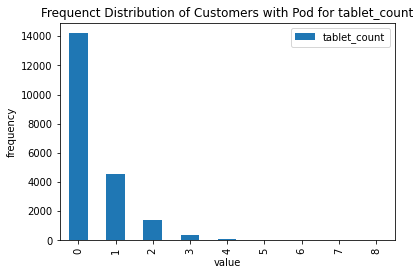

smarthome_count


<Figure size 432x288 with 0 Axes>

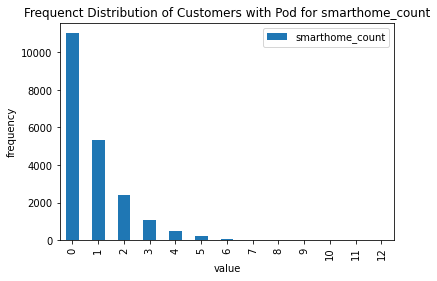

traffic_tx_bucket


<Figure size 432x288 with 0 Axes>

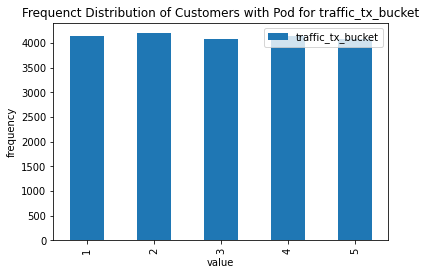

traffic_rx_bucket


<Figure size 432x288 with 0 Axes>

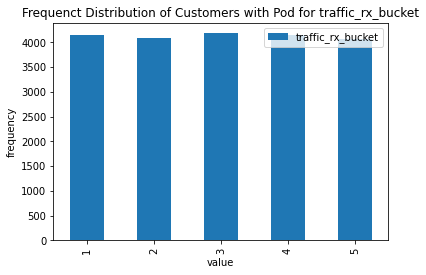

speed_tier_bucket


<Figure size 432x288 with 0 Axes>

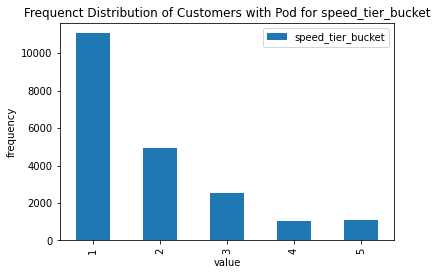

interference_5G_bucket


<Figure size 432x288 with 0 Axes>

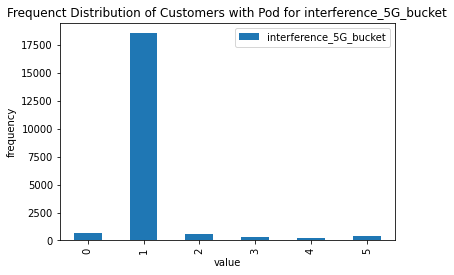

WEM_bucket


<Figure size 432x288 with 0 Axes>

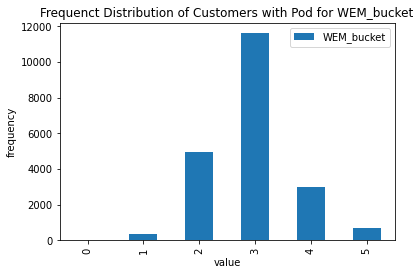

RSSI_bucket_24G


<Figure size 432x288 with 0 Axes>

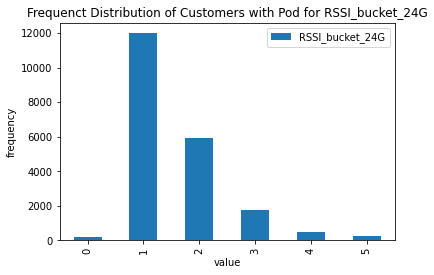

RSSI_bucket_5G


<Figure size 432x288 with 0 Axes>

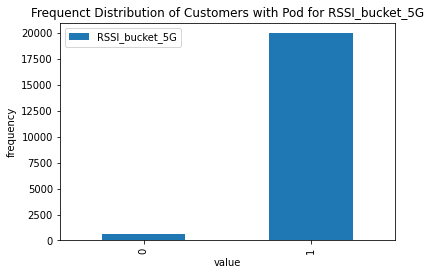

total_count_computer_phone_tablet


<Figure size 432x288 with 0 Axes>

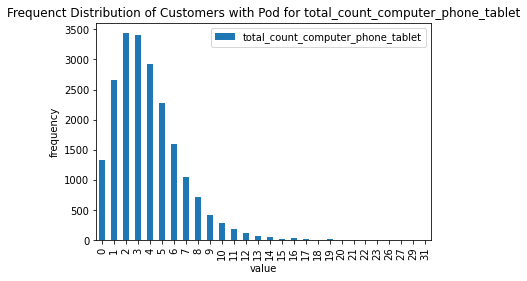

total_count


<Figure size 432x288 with 0 Axes>

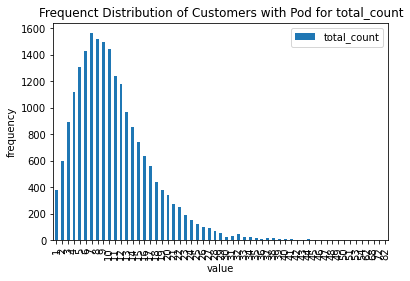

total_count_gaming_tv_printer 


<Figure size 432x288 with 0 Axes>

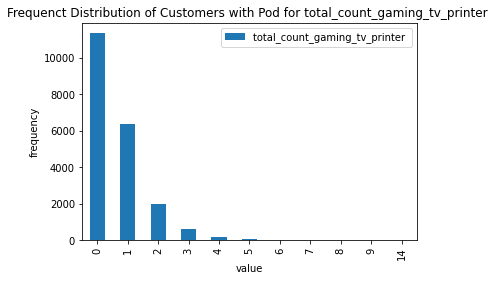

bad_quality_traffic_tx


<Figure size 432x288 with 0 Axes>

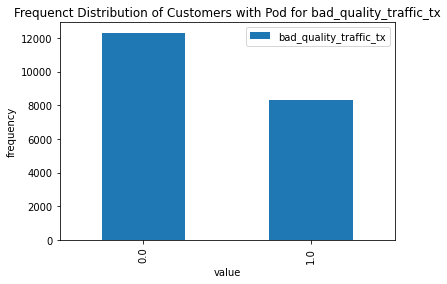

bad_quality_traffic_rx


<Figure size 432x288 with 0 Axes>

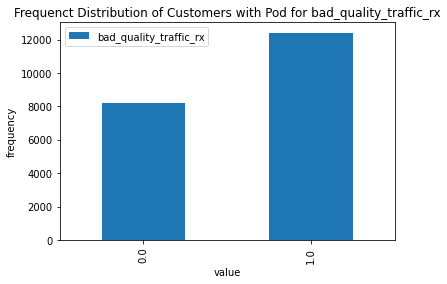

bad_quality_speed_tier


<Figure size 432x288 with 0 Axes>

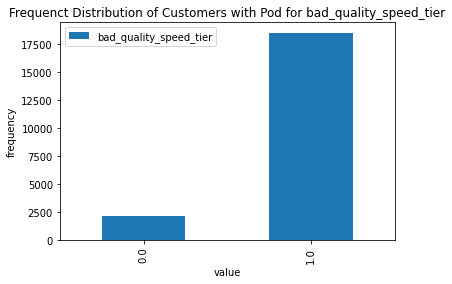

bad_quality_interference_5G


<Figure size 432x288 with 0 Axes>

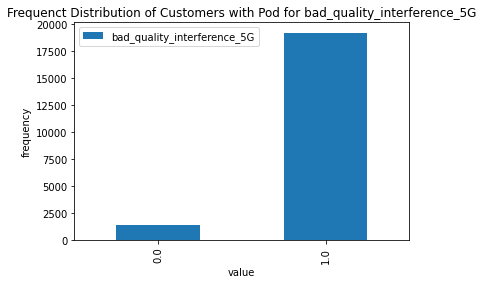

bad_quality_WEM


<Figure size 432x288 with 0 Axes>

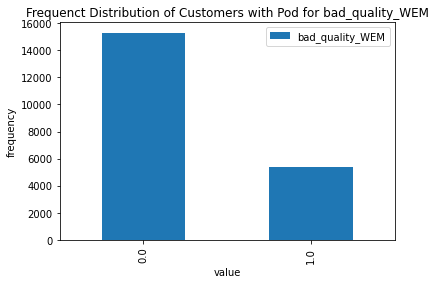

<Figure size 432x288 with 0 Axes>

In [19]:
col_list = list(df.columns)
col_list.remove("has_pod")
col_list.remove("gw_mac_address")
for col in col_list:
    print(col)
    fig, ax = plt.subplots()
#     df[col] = df[col].astype(int)
#     df = df.sort_values(col)
#     df[df["has_pod"] == 0][col].value_counts().reset_index().sort_values('index').set_index('index').plot(ax=ax, kind='bar', xlabel='value', ylabel='frequency', title='Frequenct Distribution of Customers without Pod for ' + col)
#     fig2, ax2 = plt.subplots()
#     df[df["has_pod"] == 1][col].value_counts().reset_index().sort_values('index').set_index('index').plot(ax=ax2, kind='bar', xlabel='value', ylabel='frequency', title='Frequenct Distribution of Customers with Pod for ' + col)
#     plt.show()
#     plt.clf()
    df[col].value_counts().reset_index().sort_values('index').set_index('index').plot(ax=ax, kind='bar', xlabel='value', ylabel='frequency', title='Frequenct Distribution of Customers with Pod for ' + col)
    plt.show()
    plt.clf()


************************************
 test hypothesis for column tablet_count
0.0 0.0 1.0
[-1.0, 0, 1.0, 8.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (1.0, 8.0]        1     274   1887  0.145204                 20627   
3         (0.0, 1.0]        1     464   4539  0.102225                 20627   
5        (-1.0, 0.0]        1    1124  14201  0.079149                 20627   

   perc_count    diff  
1    0.091482  -0.066  
3    0.220051  -0.066  
5    0.688467  -0.066  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


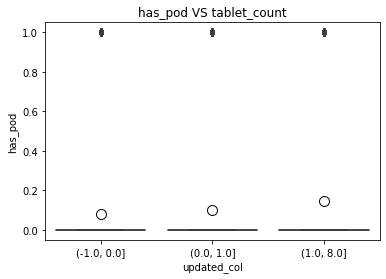


************************************
 test hypothesis for column smarthome_count
0.0 1.0 2.0
[-1.0, 0, 1.0, 2.0, 12.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1        (2.0, 12.0]        1     273   1846  0.147887                 20627   
3         (1.0, 2.0]        1     245   2393  0.102382                 20627   
5         (0.0, 1.0]        1     466   5350  0.087103                 20627   
7        (-1.0, 0.0]        1     878  11038  0.079543                 20627   

   perc_count    diff  
1    0.089494  -0.068  
3    0.116013  -0.068  
5    0.259369  -0.068  
7    0.535124  -0.068  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

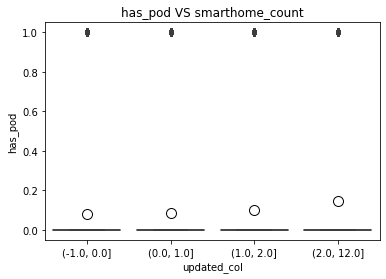


************************************
 test hypothesis for column traffic_tx_bucket
2.0 3.0 4.0
[0, 1, 2, 3, 4, 5]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1             (4, 5]        1     337   4082  0.082558                 20627   
3             (3, 4]        1     340   4144  0.082046                 20627   
5             (2, 3]        1     362   4072  0.088900                 20627   
7             (1, 2]        1     396   4194  0.094421                 20627   
9             (0, 1]        1     427   4135  0.103265                 20627   

   perc_count   diff  
1    0.197896  0.021  
3    0.200902  0.021  
5    0.197411  0.021  
7    0.203326  0.021  
9    0.200465  0.021  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

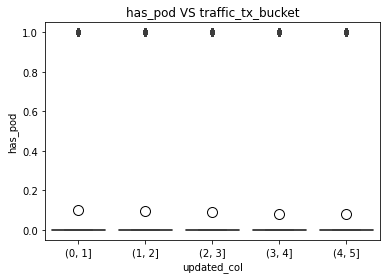


************************************
 test hypothesis for column traffic_rx_bucket
2.0 3.0 4.0
[0, 1, 2, 3, 4, 5]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1             (4, 5]        1     283   4072  0.069499                 20627   
3             (3, 4]        1     364   4148  0.087753                 20627   
5             (2, 3]        1     384   4183  0.091800                 20627   
7             (1, 2]        1     404   4083  0.098947                 20627   
9             (0, 1]        1     427   4141  0.103115                 20627   

   perc_count   diff  
1    0.197411  0.034  
3    0.201096  0.034  
5    0.202792  0.034  
7    0.197944  0.034  
9    0.200756  0.034  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

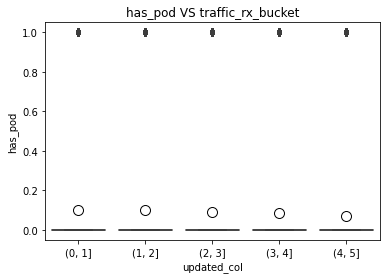


************************************
 test hypothesis for column speed_tier_bucket
1.0 2.0 3.0
[0, 1, 2, 3, 4, 5]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1             (4, 5]        1     282   1104  0.255435                 20627   
3             (3, 4]        1     156   1036  0.150579                 20627   
5             (2, 3]        1     252   2520  0.100000                 20627   
7             (1, 2]        1     170   4911  0.034616                 20627   
9             (0, 1]        1    1002  11056  0.090630                 20627   

   perc_count    diff  
1    0.053522  -0.165  
3    0.050225  -0.165  
5    0.122170  -0.165  
7    0.238086  -0.165  
9    0.535997  -0.165  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

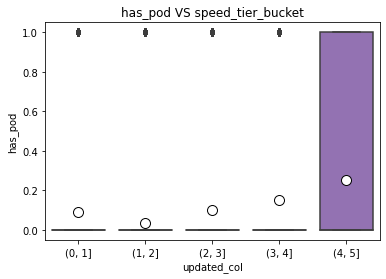


************************************
 test hypothesis for column interference_5G_bucket
1.0 1.0 1.0
[-1.0, 0, 1.0, 5.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (1.0, 5.0]        1     206   1426  0.144460                 20627   
3         (0.0, 1.0]        1    1640  18566  0.088334                 20627   
5        (-1.0, 0.0]        1      16    635  0.025197                 20627   

   perc_count    diff  
1    0.069133  -0.119  
3    0.900082  -0.119  
5    0.030785  -0.119  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


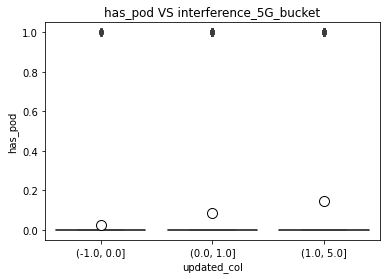


************************************
 test hypothesis for column WEM_bucket
3.0 3.0 3.0
[-1, 0, 1, 2, 3, 4, 5]
   column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1              (4, 5]        1      39    678  0.057522                 20627   
3              (3, 4]        1     344   2991  0.115012                 20627   
5              (2, 3]        1    1146  11611  0.098700                 20627   
7              (1, 2]        1     315   4952  0.063611                 20627   
9              (0, 1]        1      14    347  0.040346                 20627   
11            (-1, 0]        1       4     48  0.083333                 20627   

    perc_count   diff  
1     0.032870  0.026  
3     0.145004  0.026  
5     0.562903  0.026  
7     0.240074  0.026  
9     0.016823  0.026  
11    0.002327  0.026  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

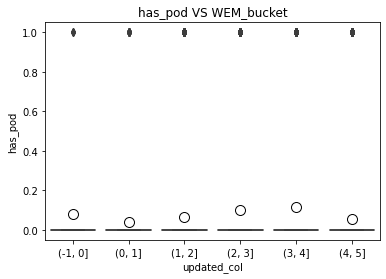


************************************
 test hypothesis for column RSSI_bucket_24G
1.0 1.0 2.0
[-1, 0, 1, 2, 3, 4, 5]
   column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1              (4, 5]        1      12    272  0.044118                 20627   
3              (3, 4]        1      51    478  0.106695                 20627   
5              (2, 3]        1     212   1766  0.120045                 20627   
7              (1, 2]        1     642   5937  0.108135                 20627   
9              (0, 1]        1     939  11984  0.078354                 20627   
11            (-1, 0]        1       6    190  0.031579                 20627   

    perc_count    diff  
1     0.013187  -0.013  
3     0.023174  -0.013  
5     0.085616  -0.013  
7     0.287827  -0.013  
9     0.580986  -0.013  
11    0.009211  -0.013  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

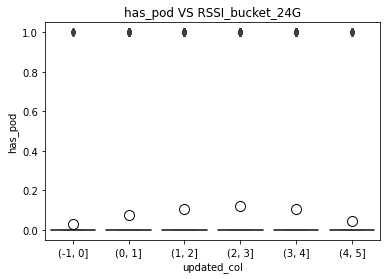


************************************
 test hypothesis for column RSSI_bucket_5G
1.0 1.0 1.0
[-1.0, 0, 1.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (0.0, 1.0]        1    1846  19992  0.092337                 20627   
3        (-1.0, 0.0]        1      16    635  0.025197                 20627   

   perc_count    diff  
1    0.969215  -0.067  
3    0.030785  -0.067  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


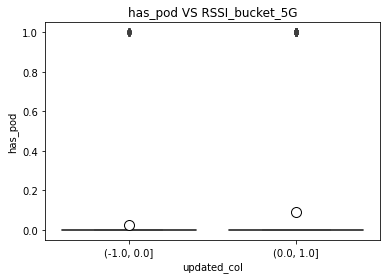


************************************
 test hypothesis for column total_count_computer_phone_tablet
2.0 4.0 6.0
[-1.0, 0, 2.0, 4.0, 6.0, 31.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1        (6.0, 31.0]        1     345   3000  0.115000                 20627   
3         (4.0, 6.0]        1     427   3864  0.110507                 20627   
5         (2.0, 4.0]        1     559   6322  0.088421                 20627   
7         (0.0, 2.0]        1     466   6104  0.076343                 20627   
9        (-1.0, 0.0]        1      65   1337  0.048616                 20627   

   perc_count    diff  
1    0.145440  -0.066  
3    0.187327  -0.066  
5    0.306491  -0.066  
7    0.295923  -0.066  
9    0.064818  -0.066  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

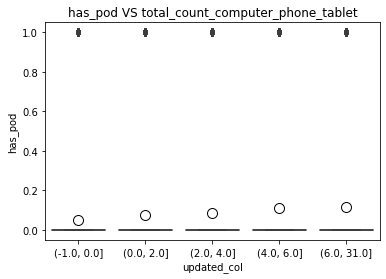


************************************
 test hypothesis for column total_count
7.0 10.0 15.0
[0.0, 7.0, 10.0, 15.0, 82.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1       (15.0, 82.0]        1     643   3919  0.164072                 20627   
3       (10.0, 15.0]        1     492   4972  0.098954                 20627   
5        (7.0, 10.0]        1     344   4453  0.077251                 20627   
7         (0.0, 7.0]        1     383   7283  0.052588                 20627   

   perc_count    diff  
1    0.189994  -0.111  
3    0.241043  -0.111  
5    0.215882  -0.111  
7    0.353081  -0.111  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

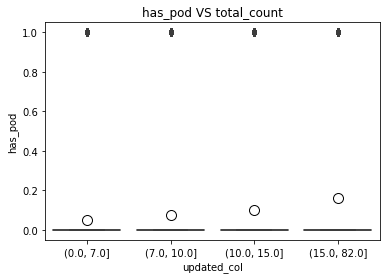


************************************
 test hypothesis for column total_count_gaming_tv_printer 
0.0 0.0 1.0
[-1.0, 0, 1.0, 14.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1        (1.0, 14.0]        1     406   2884  0.140777                 20627   
3         (0.0, 1.0]        1     611   6391  0.095603                 20627   
5        (-1.0, 0.0]        1     845  11352  0.074436                 20627   

   perc_count    diff  
1    0.139817  -0.066  
3    0.309837  -0.066  
5    0.550347  -0.066  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


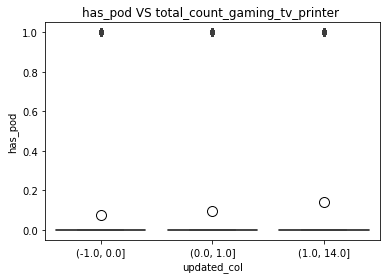


************************************
 test hypothesis for column bad_quality_traffic_tx
0.0 0.0 1.0
[-1.0, 0, 1.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (0.0, 1.0]        1     823   8329  0.098811                 20627   
3        (-1.0, 0.0]        1    1039  12298  0.084485                 20627   

   perc_count    diff  
1    0.403791  -0.014  
3    0.596209  -0.014  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


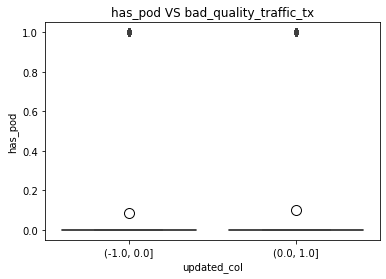


************************************
 test hypothesis for column bad_quality_traffic_rx
0.0 1.0 1.0
[-1.0, 0, 1.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (0.0, 1.0]        1    1215  12407  0.097929                 20627   
3        (-1.0, 0.0]        1     647   8220  0.078710                 20627   

   perc_count    diff  
1    0.601493  -0.019  
3    0.398507  -0.019  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


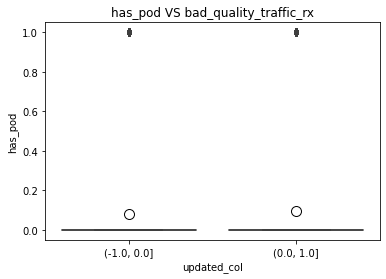


************************************
 test hypothesis for column bad_quality_speed_tier
1.0 1.0 1.0
[-1.0, 0, 1.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (0.0, 1.0]        1    1424  18487  0.077027                 20627   
3        (-1.0, 0.0]        1     438   2140  0.204673                 20627   

   perc_count   diff  
1    0.896252  0.128  
3    0.103748  0.128  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


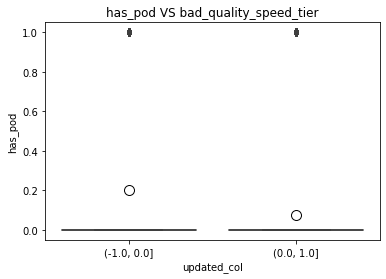


************************************
 test hypothesis for column bad_quality_interference_5G
1.0 1.0 1.0
[-1.0, 0, 1.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (0.0, 1.0]        1    1656  19201  0.086246                 20627   
3        (-1.0, 0.0]        1     206   1426  0.144460                 20627   

   perc_count   diff  
1    0.930867  0.058  
3    0.069133  0.058  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


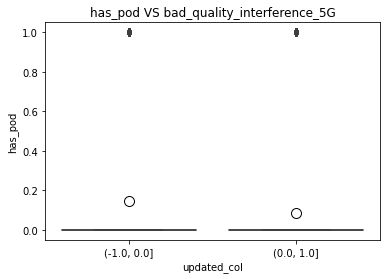


************************************
 test hypothesis for column bad_quality_WEM
0.0 0.0 1.0
[-1.0, 0, 1.0]
  column_categorical  has_pod  counts  total  perc_pod  total_count_customer  \
1         (0.0, 1.0]        1     333   5347  0.062278                 20627   
3        (-1.0, 0.0]        1    1529  15280  0.100065                 20627   

   perc_count   diff  
1    0.259223  0.038  
3    0.740777  0.038  


C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",
C:\Users\esra.ozikinci.YGC\AppData\Local\Temp\ipykernel_19892\607819788.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(dict(zip(test.columns, [column, c,"1",


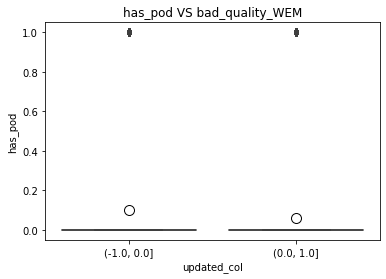

,Variable Name,Varable Label,Churn Label,Count,Total Count Within Variable,Total Count,Pod Perc,Count Percentage,Diff
0,tablet_count,"(1.0, 8.0]",1,274,1887,20627,0.145,0.091,-0.066
1,tablet_count,"(0.0, 1.0]",1,464,4539,20627,0.102,0.220,-0.066
2,tablet_count,"(-1.0, 0.0]",1,1124,14201,20627,0.079,0.688,-0.066
3,smarthome_count,"(2.0, 12.0]",1,273,1846,20627,0.148,0.089,-0.068
4,smarthome_count,"(1.0, 2.0]",1,245,2393,20627,0.102,0.116,-0.068
...,...,...,...,...,...,...,...,...,...
56,bad_quality_speed_tier,"(-1.0, 0.0]",1,438,2140,20627,0.205,0.104,0.128
57,bad_quality_interference_5G,"(0.0, 1.0]",1,1656,19201,20627,0.086,0.931,0.058
58,bad_quality_interference_5G,"(-1.0, 0.0]",1,206,1426,20627,0.144,0.069,0.058
59,bad_quality_WEM,"(0.0, 1.0]",1,333,5347,20627,0.062,0.259,0.038


In [20]:
# results for categorical variables
test = pd.DataFrame(columns=['Variable Name', 'Varable Label', 'Churn Label', 'Count', 'Total Count Within Variable', 
                             "Total Count", 'Pod Perc', 'Count Percentage' , 'Diff'])
num_column_list = list(df.columns)
# num_column_list.remove("home_network_type")
num_column_list.remove("gw_mac_address")
num_column_list.remove("has_pod")

var_column = "has_pod"
for column in num_column_list:
    df_copy = df.copy()
    df_copy[column] = df_copy[column].fillna(0)

    data = df_copy[[column, var_column]]
    churn_col = data[data[var_column] == 1][column]
    non_churn_col = data[data[var_column] == 0][column]

    print("\n************************************\n test hypothesis for column", column)
    if df_copy.shape[0] > 0:
        df_copy[column] = df_copy[column].astype('float')
        min_value = df_copy[column].min()
        max_value = df_copy[column].max()            

        Q1 = np.quantile(df_copy[column],0.3)
        Q2 = np.quantile(df_copy[column],0.55)
        Q3 = np.quantile(df_copy[column],0.8)
        print(Q1, Q2, Q3)
        if column == "mobile_phones_count":
            Q1 = 2
            Q2 = 4
            Q3 = 4
            
        cat_list = sorted(list(set([min_value-1, 0, Q1, Q2, Q3, max_value])))   
   
        if column in ["traffic_tx_bucket", "traffic_rx_bucket", "speed_tier_bucket"]:
            cat_list = sorted(list(set([ 0, 1, 2, 3, 4, 5])))  
               
        if column in ["WEM_bucket", "RSSI_bucket_24G"]:
            cat_list = sorted(list(set([-1, 0, 1, 2, 3, 4, 5])))   
  
            
        print(cat_list)
        df_copy['column_categorical'] = pd.cut(df_copy[column], cat_list)

        result = df_copy.groupby(["column_categorical", var_column])["gw_mac_address"].count().reset_index(drop=False).rename(columns={"gw_mac_address":"counts"})
        result_2 = result.groupby(["column_categorical"], observed=True).agg({"counts":"sum"}).rename(columns={"counts":"total"}).reset_index(drop=False)
        result = pd.merge(result, result_2, on = "column_categorical", how = 'left')
        result["perc_pod"] = (result["counts"]/result["total"])
        result["total_count_customer"] = df_copy[~df_copy[column].isna()]["gw_mac_address"].nunique()
        result["perc_count"] = (result["total"]/result["total_count_customer"])
        result["order_column"] = result["column_categorical"].astype(str).str.split(r"\]|,|\(")
        result["order_column_1"] = result["order_column"].str[0]
        result["order_column_2"] = result["order_column"].str[1]
        result["order_column_2"] = result["order_column_2"].astype(float) + 0.00001

        result["order_column"] = np.where(result["order_column_2"].isnull(), result["order_column_1"], result["order_column_2"])
        result["order_column"] = result["order_column"].astype(float)
        result= result.sort_values("order_column", ascending=False).reset_index(drop=True)
        result = result.drop(columns=["order_column", "order_column_1", "order_column_2"])
        if result[result[var_column] == 1].shape[0] > 1:
            result["diff"] = '{0:.3f}'.format(result[result[var_column] == 1]["perc_pod"].iloc[-1]- result[(result[var_column] == 1)]["perc_pod"].iloc[0])
        else:
            result["diff"] = ""
        print(result[result[var_column] == 1])

        data = df_copy[df_copy[var_column] == 1][[column, 'column_categorical']]
        cat_list = result[result[var_column] == 1].column_categorical.unique()

        if result[(result[var_column] == 1)].shape[0] > 0:
            for c in result["column_categorical"].unique():
                test = test.append(dict(zip(test.columns, [column, c,"1", 
                                                           result[(result[var_column] == 1) & (result["column_categorical"] == c)][["counts"]].values[0][0], 
                                                           result[(result[var_column] == 1) & (result["column_categorical"] == c)][["total"]].values[0][0], 
                                                           result[(result[var_column] == 1) & (result["column_categorical"] == c)][["total_count_customer"]].values[0][0], 
                                                            '{0:.3f}'.format(result[(result[var_column] == 1) & (result["column_categorical"] == c)][["perc_pod"]].values[0][0]), 
                                                            '{0:.3f}'.format(result[(result[var_column] == 1) & (result["column_categorical"] == c)][["perc_count"]].values[0][0]),
                                                           result[(result[var_column] == 1) & (result["column_categorical"] == c)][["diff"]].values[0][0]])), ignore_index=True)
        df_copy["updated_col"] = df_copy["column_categorical"].astype("category")
        sns.boxplot(y=var_column, x="updated_col", data=df_copy, showmeans=True, meanprops={"marker":"o",
                 "markerfacecolor":"white",
                 "markeredgecolor":"black",
                 "markersize":"10"})

        plt.title(var_column+" VS "+column)
#             plt.savefig("C:/Users/esra.ozikinci/Metyis/De Heus - General/6. Churn/initial data analysis/graphs_from_esra/Box_Plots/Rundvee_v3_"+ var_column+"&"+column +".jpeg")
        plt.show()
        plt.clf()
        plt.close()
test 
